## B.1 Importar librerías

In [1]:
import numpy as np
import seaborn as sns
from sklearn.datasets import make_moons, fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import itertools

## B.2 Creacion de dataset "Two Moons"

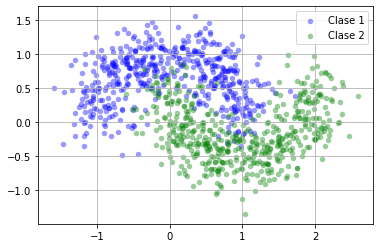

In [2]:
# Creamos datos X, y
N = 2000
X, y = make_moons(n_samples=N, noise=0.25)

# Separamos nuestros datos
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, stratify=y)

# Ploteamos los datos de entrenamiento en un scatter plot
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], c='b', marker='o', linewidth=0, alpha=0.4, s=30, label='Clase 1')
ax.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], c='g', marker='o', linewidth=0, alpha=0.4, s=30, label='Clase 2')
plt.grid()
plt.legend()
plt.show()

## B.3 Support Vector Machine

- Seleccione kernel='linear' y ajuste C $\in [0.1, 1.0, 10.0, 100.0]$
- Seleccione kernel='rbf' y ajuste C y gamma $\in [0.1, 1.0, 10.0, 100.0]$


In [3]:
def plot_classification(X_data, y_data, y_pred, ax):
    ax.scatter(
        X_data[y_data==0, 0],
        X_data[y_data==0, 1],
        c=y_pred[y_data==0],
        marker='x',
        cmap=plt.cm.RdBu,
        vmin=0,
        vmax=1,
        linewidth=1,
        alpha=0.5,
        s=20,
        label='Clase 1'
    )

    ax.scatter(
        X_data[y_data==1, 0],
        X_data[y_data==1, 1],
        c=y_pred[y_data==1],
        marker='o',
        cmap=plt.cm.RdBu,
        vmin=0,
        vmax=1,
        linewidth=1,
        alpha=0.5,
        s=20,
        label='Clase 2'
    )
    ax.set_title('Clasificación en el conjunto de test')

def plot_classification_probability(clf, X_data, y_data, ax):
    x_min, x_max = X_data[:, 0].min() - 0.5, X_data[:, 0].max() + 0.5
    y_min, y_max = X_data[:, 1].min() - 0.5, X_data[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    ax.contourf(xx, yy, Z.reshape(xx.shape), cmap=plt.cm.RdBu, alpha=0.5)
    ax.scatter(X_data[y_data==0, 0], X_data[y_data==0, 1], c='k', marker='x', linewidth=1, alpha=0.5, s=20, label='Clase 1')
    ax.scatter(X_data[y_data==1, 0], X_data[y_data==1, 1], c='k', marker='o', linewidth=0, alpha=0.5, s=20, label='Clase 2')
    ax.set_title('Probabilidad de clasificación')

def show_roc_curve(y_data, y_pred_proba, ax, label):
    fpr, tpr, th = roc_curve(y_data, y_pred_proba[:, 1])
    ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label=label)
    print(f"Area bajo la curva ROC ({label}): {auc(fpr, tpr)}")

def show_support_vectors(clf, X_data, y_data, ax):
    ax.scatter(
        X_data[y_data==0, 0],
        X_data[y_data==0, 1],
        c='k',
        marker='x',
        linewidth=1,
        alpha=0.5,
        s=20,
        label='Clase 1'
    )
    ax.scatter(
        X_data[y_data==1, 0],
        X_data[y_data==1, 1],
        c='k',
        marker='o',
        linewidth=0,
        alpha=0.5,
        s=20,
        label='Clase 2'
    )
    ax.scatter(
        X_data[clf.support_, 0],
        X_data[clf.support_, 1],
        c='r',
        linewidth=1,
        alpha=0.25,
        s=100
    )
    ax.set_title('Vectores de soporte')

    print("%d SVs para la clase 1" % (clf.n_support_[0]))
    print("%d SVs para la clase 2" % (clf.n_support_[1]))

Area bajo la curva ROC (test): 0.9358599999999999
Area bajo la curva ROC (train): 0.941136
166 SVs para la clase 1
166 SVs para la clase 2


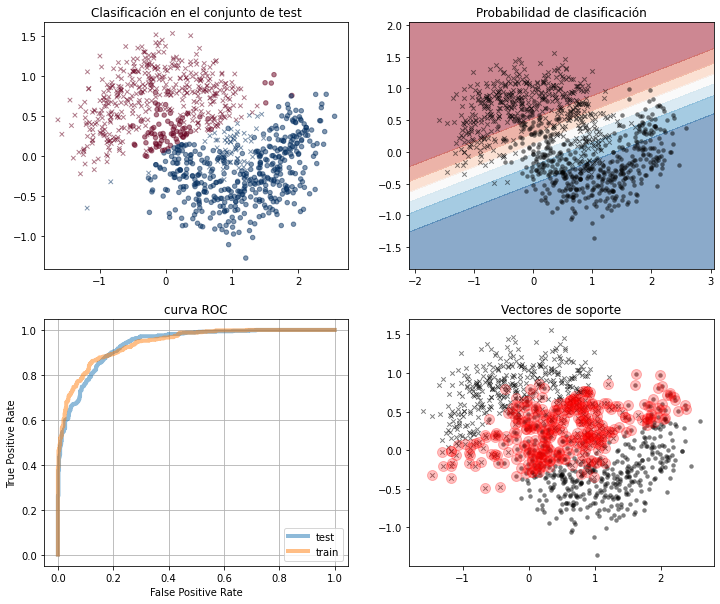

<Figure size 864x720 with 0 Axes>

In [4]:
# Creamos el clasificador
clf = SVC(C=1.0, kernel='linear', gamma=1.0, probability=True)

# Entrenamos
clf.fit(X_train, y_train)

# Predecimos la clase de los datos de test
y_pred = clf.predict(X_test)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Mostramos la clasificación en test
fig = plt.figure(figsize=(12, 10))
plot_classification(X_test, y_test, y_pred, ax=axes[0, 0])

# Mostramos la probabilidad de clasificación en toda el área de los datos
plot_classification_probability(clf, X_train, y_train, ax=axes[0, 1])

# Mostramos la curva ROC
y_pred_proba_test = clf.predict_proba(X_test)
show_roc_curve(y_test, y_pred_proba_test, ax=axes[1, 0], label="test")

y_pred_proba_train = clf.predict_proba(X_train)
show_roc_curve(y_train, y_pred_proba_train, ax=axes[1, 0], label="train")

axes[1, 0].legend(loc=4)
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('curva ROC')
axes[1, 0].grid()

# Mostramos los vectores de soporte
show_support_vectors(clf, X_train, y_train, ax=axes[1, 1])

fig.tight_layout()

plt.show()


### Experimentos

In [5]:
def show_roc_curve(y_data, y_pred_proba, ax, label):
    fpr, tpr, th = roc_curve(y_data, y_pred_proba[:, 1])
    ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label=label)
    print(f"Area bajo la curva ROC ({label}): {auc(fpr, tpr)}")
    return auc(fpr, tpr)

def SVM(C, kernel, gamma):
    # Creamos el clasificador
    clf = SVC(C=C, kernel=kernel, gamma=gamma, probability=True)

    # Entrenamos
    clf.fit(X_train, y_train)

    # Predecimos la clase de los datos de test
    y_pred = clf.predict(X_test)


    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Mostramos la clasificación en test
    fig = plt.figure(figsize=(12, 10))
    plot_classification(X_test, y_test, y_pred, ax=axes[0, 0])

    # Mostramos la probabilidad de clasificación en toda el área de los datos
    plot_classification_probability(clf, X_train, y_train, ax=axes[0, 1])

    # Mostramos la curva ROC
    y_pred_proba_test = clf.predict_proba(X_test)
    auc_test=show_roc_curve(y_test, y_pred_proba_test, ax=axes[1, 0], label="test")

    y_pred_proba_train = clf.predict_proba(X_train)
    auc_train=show_roc_curve(y_train, y_pred_proba_train, ax=axes[1, 0], label="train")

    axes[1, 0].legend(loc=4)
    axes[1, 0].set_xlabel('False Positive Rate')
    axes[1, 0].set_ylabel('True Positive Rate')
    axes[1, 0].set_title('curva ROC')
    axes[1, 0].grid()

    # Mostramos los vectores de soporte
    show_support_vectors(clf, X_train, y_train, ax=axes[1, 1])

    fig.tight_layout()

    plt.show()
    return auc_test, auc_train

#### Experimento 1.3

Clasificación para C = 0.1
Area bajo la curva ROC (test): 0.9353759999999999
Area bajo la curva ROC (train): 0.940692
190 SVs para la clase 1
190 SVs para la clase 2


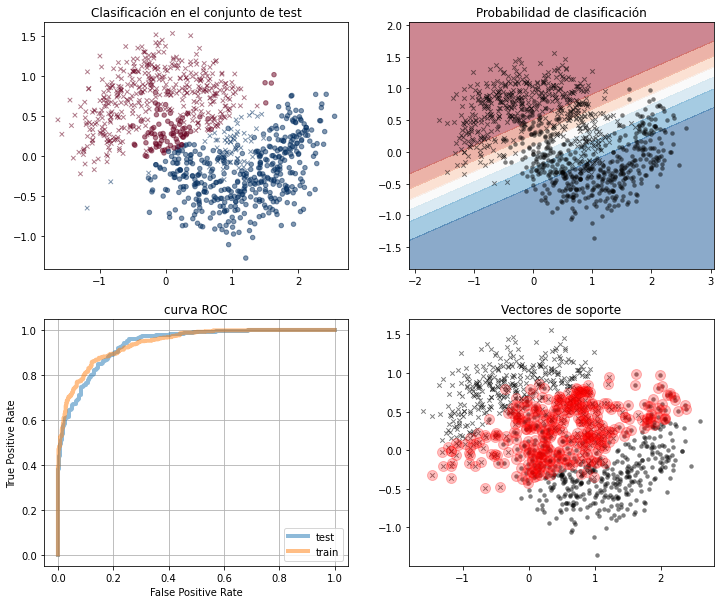

<Figure size 864x720 with 0 Axes>

 
Clasificación para C = 1
Area bajo la curva ROC (test): 0.935848
Area bajo la curva ROC (train): 0.941152
166 SVs para la clase 1
166 SVs para la clase 2


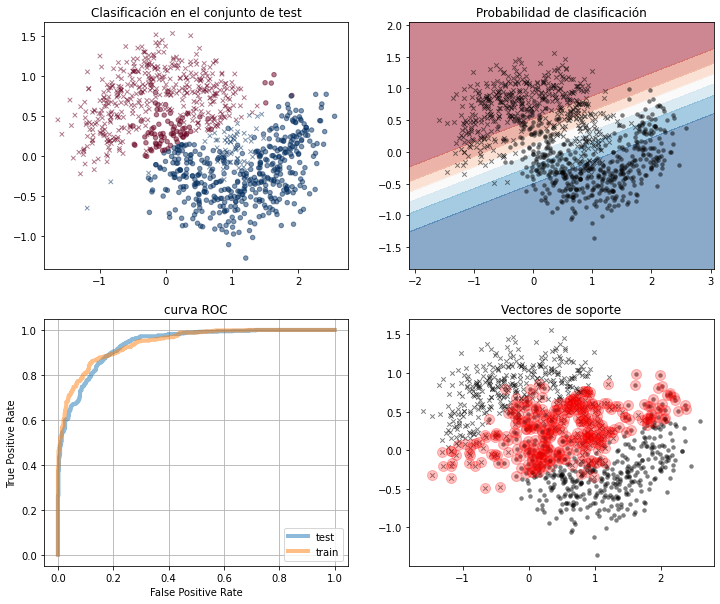

<Figure size 864x720 with 0 Axes>

 
Clasificación para C = 10
Area bajo la curva ROC (test): 0.935968
Area bajo la curva ROC (train): 0.9411160000000001
163 SVs para la clase 1
163 SVs para la clase 2


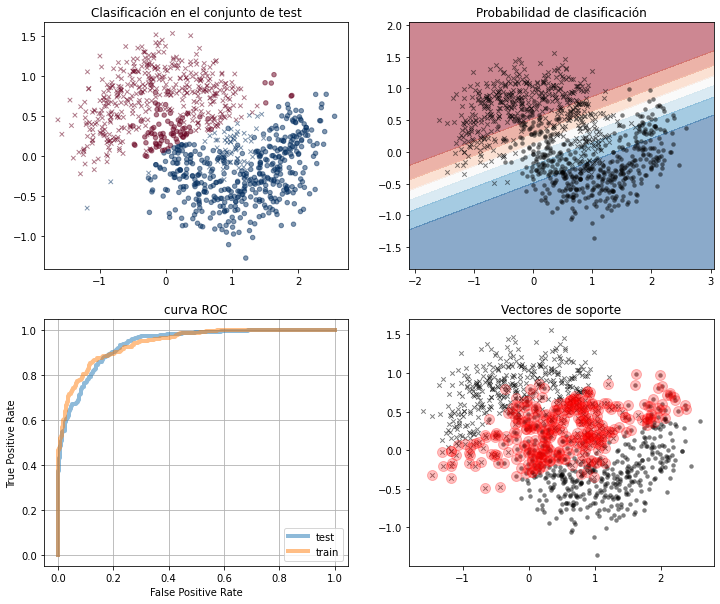

<Figure size 864x720 with 0 Axes>

 
Clasificación para C = 100
Area bajo la curva ROC (test): 0.935962
Area bajo la curva ROC (train): 0.9410999999999999
163 SVs para la clase 1
163 SVs para la clase 2


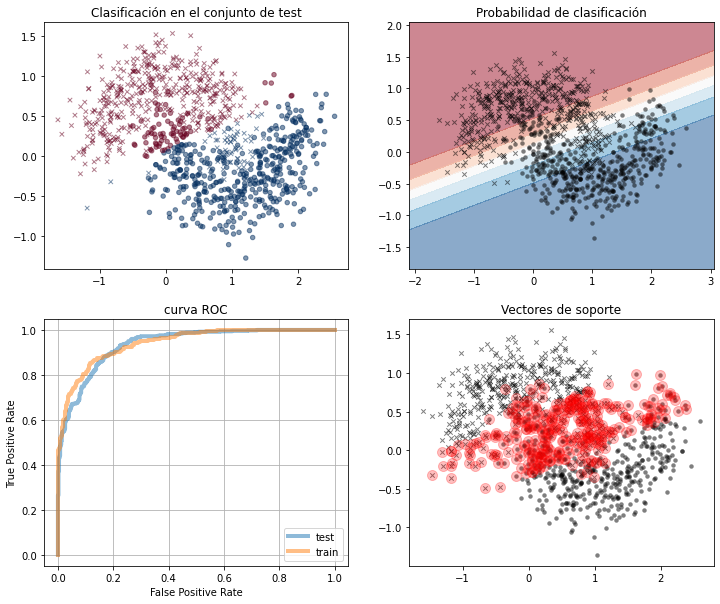

<Figure size 864x720 with 0 Axes>

In [6]:
#Ajustando SVM con kernel lineal
C_list=[0.1,1,10,100]
Auc_test_C_linear_list=[]
Auc_train_C_linear_list=[]
for c in C_list:
    print(f'Clasificación para C = {c}')
    auc_test, auc_train= SVM(c, 'linear', 1.0)
    Auc_test_C_linear_list.append(auc_test)
    Auc_train_C_linear_list.append(auc_train)
    print(' ')

Clasificación para gamma = 0.1
Area bajo la curva ROC (test): 0.945212
Area bajo la curva ROC (train): 0.949424
181 SVs para la clase 1
180 SVs para la clase 2


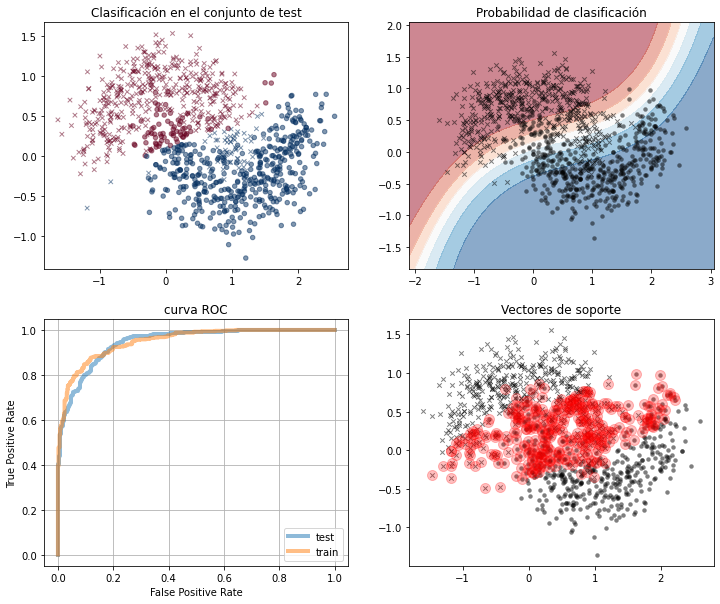

<Figure size 864x720 with 0 Axes>

 
Clasificación para gamma = 1
Area bajo la curva ROC (test): 0.986604
Area bajo la curva ROC (train): 0.986648
104 SVs para la clase 1
104 SVs para la clase 2


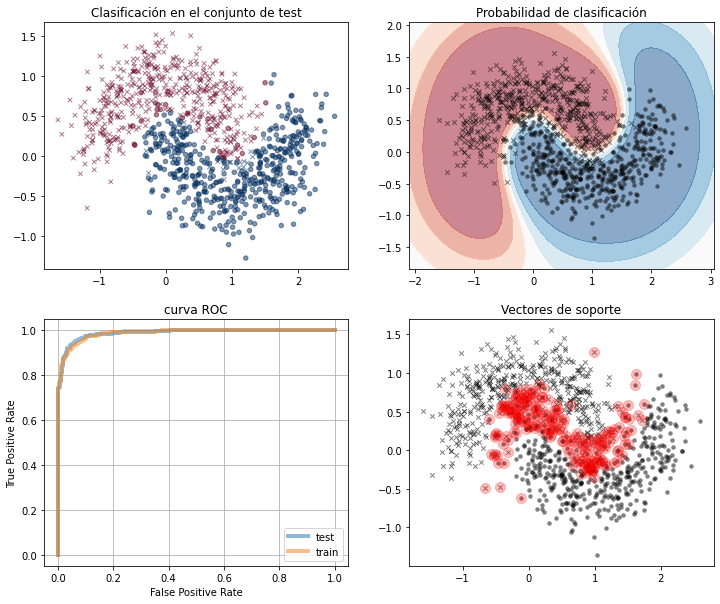

<Figure size 864x720 with 0 Axes>

 
Clasificación para gamma = 10
Area bajo la curva ROC (test): 0.970926
Area bajo la curva ROC (train): 0.976406
119 SVs para la clase 1
121 SVs para la clase 2


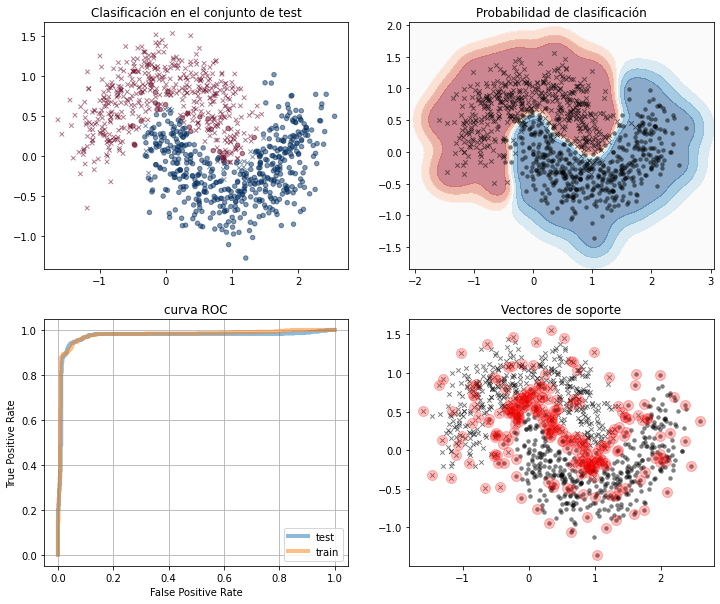

<Figure size 864x720 with 0 Axes>

 
Clasificación para gamma = 100
Area bajo la curva ROC (test): 0.9696480000000001
Area bajo la curva ROC (train): 0.991376
330 SVs para la clase 1
348 SVs para la clase 2


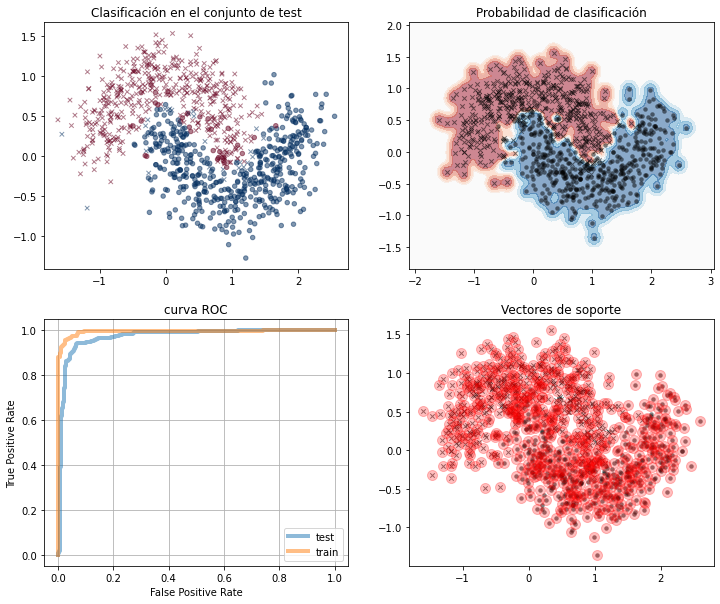

<Figure size 864x720 with 0 Axes>

In [7]:
#Ajustando gamma de un SVM con kernel gaussiano y C=1
Gamma_list=[0.1,1,10,100]
Auc_test_gamma_gaussian_list=[]
Auc_train_gamma_gaussian_list=[]
for gamma in Gamma_list:
    print(f'Clasificación para gamma = {gamma}')
    auc_test, auc_train = SVM(1, 'rbf', gamma)
    Auc_test_gamma_gaussian_list.append(auc_test)
    Auc_train_gamma_gaussian_list.append(auc_train) 
    print(' ')

Clasificación para C = 0.1
Area bajo la curva ROC (test): 0.979676
Area bajo la curva ROC (train): 0.9800679999999999
170 SVs para la clase 1
169 SVs para la clase 2


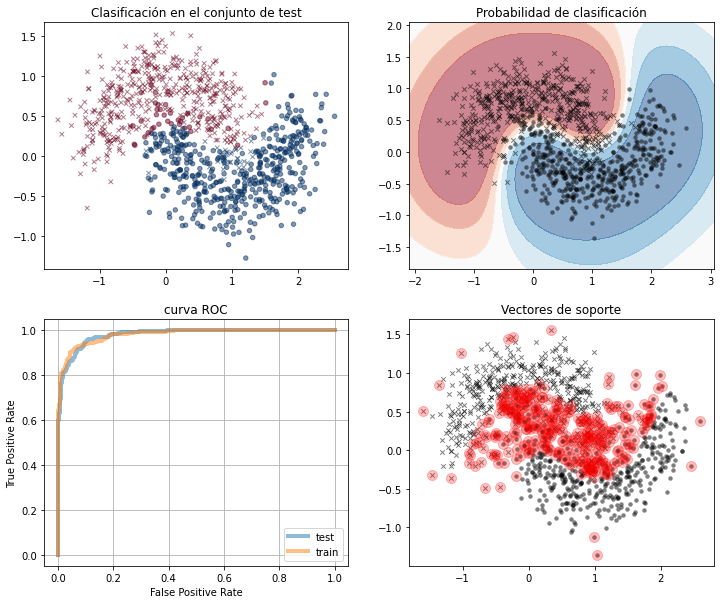

<Figure size 864x720 with 0 Axes>

 
Clasificación para C = 1
Area bajo la curva ROC (test): 0.986612
Area bajo la curva ROC (train): 0.9866360000000001
104 SVs para la clase 1
104 SVs para la clase 2


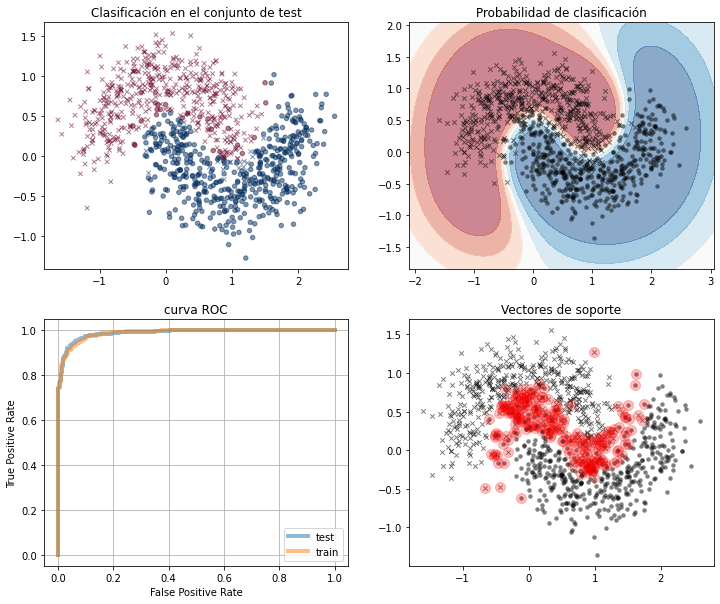

<Figure size 864x720 with 0 Axes>

 
Clasificación para C = 10
Area bajo la curva ROC (test): 0.9867799999999999
Area bajo la curva ROC (train): 0.9870519999999999
82 SVs para la clase 1
80 SVs para la clase 2


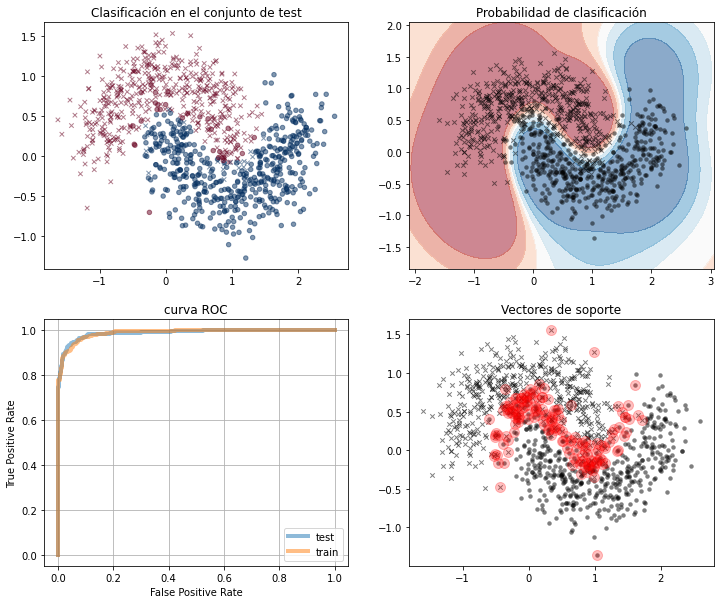

<Figure size 864x720 with 0 Axes>

 
Clasificación para C = 100
Area bajo la curva ROC (test): 0.9833959999999998
Area bajo la curva ROC (train): 0.98598
76 SVs para la clase 1
79 SVs para la clase 2


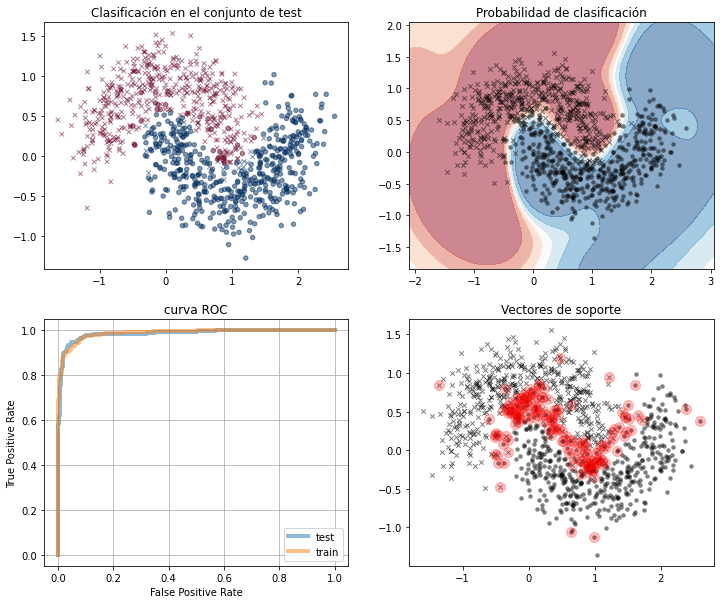

<Figure size 864x720 with 0 Axes>

In [8]:
#Ajustando C de un SVM con kernel gaussiano y gamma=1
C_list=[0.1,1,10,100]
Auc_test_C_gaussian_list=[]
Auc_train_C_gaussian_list=[]
for c in C_list:
    print(f'Clasificación para C = {c}')
    auc_test, auc_train = SVM(c, 'rbf', 1.0)
    Auc_test_C_gaussian_list.append(auc_test)
    Auc_train_C_gaussian_list.append(auc_train) 
    print(' ')

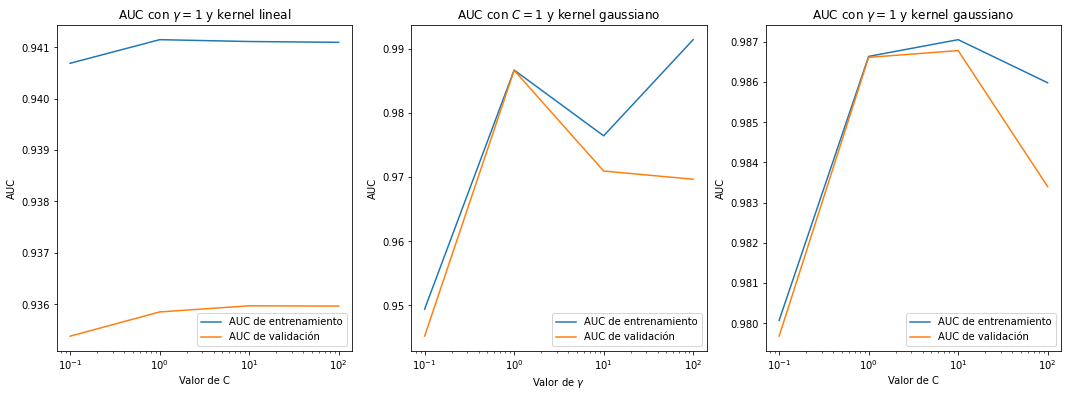

In [9]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize=(18,6))
axs[0].plot(C_list, Auc_train_C_linear_list, label='AUC de entrenamiento')
axs[0].plot(C_list, Auc_test_C_linear_list, label='AUC de validación') 
axs[0].set_xscale("log")
axs[0].set_xlabel('Valor de C')
axs[0].set_ylabel('AUC')
axs[0].set_title(r'AUC con $\gamma=1$ y kernel lineal')
axs[0].legend(loc='best')

axs[1].plot(C_list, Auc_train_gamma_gaussian_list, label='AUC de entrenamiento')
axs[1].plot(C_list, Auc_test_gamma_gaussian_list, label='AUC de validación') 
axs[1].set_xscale("log")
axs[1].set_xlabel(r'Valor de $\gamma$')
axs[1].set_ylabel('AUC')
axs[1].set_title(r'AUC con $C=1$ y kernel gaussiano')
axs[1].legend(loc='lower right')

axs[2].plot(C_list, Auc_train_C_gaussian_list, label='AUC de entrenamiento')
axs[2].plot(C_list, Auc_test_C_gaussian_list, label='AUC de validación') 
axs[2].set_xscale("log")
axs[2].set_xlabel('Valor de C')
axs[2].set_ylabel('AUC')
axs[2].set_title(r'AUC con $\gamma=1$ y kernel gaussiano')
axs[2].legend(loc='lower right')

## B.4 Random Forests

Area bajo la curva ROC (test): 0.981004
Area bajo la curva ROC (train): 1.0


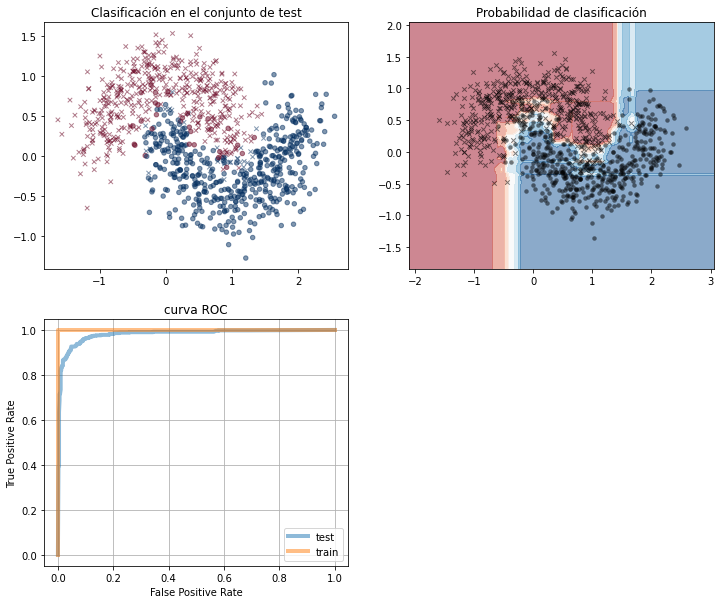

<Figure size 864x720 with 0 Axes>

In [10]:
clf = RandomForestClassifier(
    n_estimators=50,
    criterion='gini',
    max_depth=10,
    max_features='sqrt',
    n_jobs=-1
)

# Entrenamos
clf.fit(X_train, y_train)

# Predecimos la clase de los datos de test
y_pred = clf.predict(X_test)


fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Mostramos la clasificación en test
fig = plt.figure(figsize=(12, 10))
plot_classification(X_test, y_test, y_pred, ax=axes[0, 0])

# Mostramos la probabilidad de clasificación en toda el área de los datos
plot_classification_probability(clf, X_train, y_train, ax=axes[0, 1])

# Mostramos la curva ROC
y_pred_proba_test = clf.predict_proba(X_test)
show_roc_curve(y_test, y_pred_proba_test, ax=axes[1, 0], label="test")

y_pred_proba_train = clf.predict_proba(X_train)
show_roc_curve(y_train, y_pred_proba_train, ax=axes[1, 0], label="train")

axes[1, 0].legend(loc=4)
axes[1, 0].set_xlabel('False Positive Rate')
axes[1, 0].set_ylabel('True Positive Rate')
axes[1, 0].set_title('curva ROC')
axes[1, 0].grid()

fig.tight_layout()
axes[1, 1].remove()

plt.show()

### Experimento 

In [11]:
def show_roc_curve(y_data, y_pred_proba, ax, label):
    fpr, tpr, th = roc_curve(y_data, y_pred_proba[:, 1])
    ax.plot(fpr, tpr, linewidth=4, alpha=0.5, label=label)
    print(f"Area bajo la curva ROC ({label}): {auc(fpr, tpr)}")
    return auc(fpr, tpr)

def random_forest(n_estimators, max_depth):
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion='gini',
        max_depth=max_depth,
        max_features='sqrt',
        n_jobs=-1
    )

    # Entrenamos
    clf.fit(X_train, y_train)

    # Predecimos la clase de los datos de test
    y_pred = clf.predict(X_test)


    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Mostramos la clasificación en test
    fig = plt.figure(figsize=(12, 10))
    plot_classification(X_test, y_test, y_pred, ax=axes[0, 0])

    # Mostramos la probabilidad de clasificación en toda el área de los datos
    plot_classification_probability(clf, X_train, y_train, ax=axes[0, 1])

    # Mostramos la curva ROC
    y_pred_proba_test = clf.predict_proba(X_test)
    auc_test=show_roc_curve(y_test, y_pred_proba_test, ax=axes[1, 0], label="test")

    y_pred_proba_train = clf.predict_proba(X_train)
    auc_train=show_roc_curve(y_train, y_pred_proba_train, ax=axes[1, 0], label="train")

    axes[1, 0].legend(loc=4)
    axes[1, 0].set_xlabel('False Positive Rate')
    axes[1, 0].set_ylabel('True Positive Rate')
    axes[1, 0].set_title('curva ROC')
    axes[1, 0].grid()

    fig.tight_layout()
    axes[1, 1].remove()

    plt.show()
    return auc_test, auc_train

#### Experimento 2.4

Clasificación para 1 árbol y profundidad máxima 3
Area bajo la curva ROC (test): 0.84064
Area bajo la curva ROC (train): 0.846414


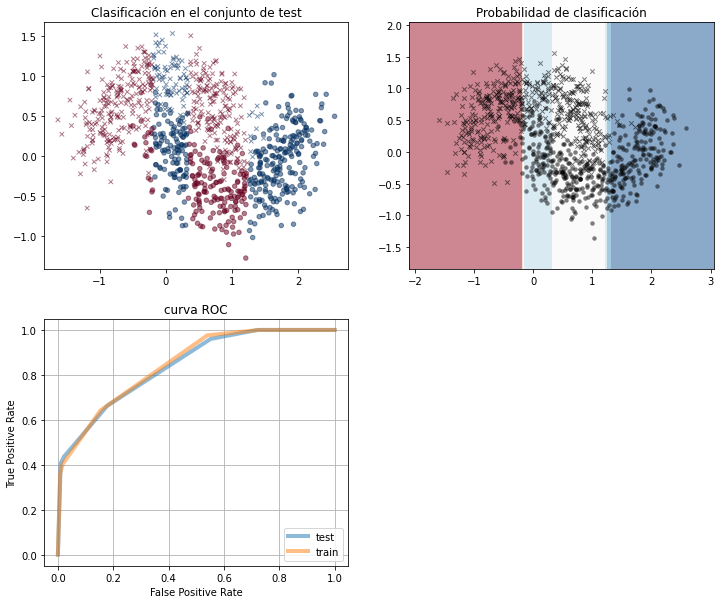

<Figure size 864x720 with 0 Axes>

 
Clasificación para 1 árbol y profundidad máxima 10
Area bajo la curva ROC (test): 0.9218560000000001
Area bajo la curva ROC (train): 0.971406


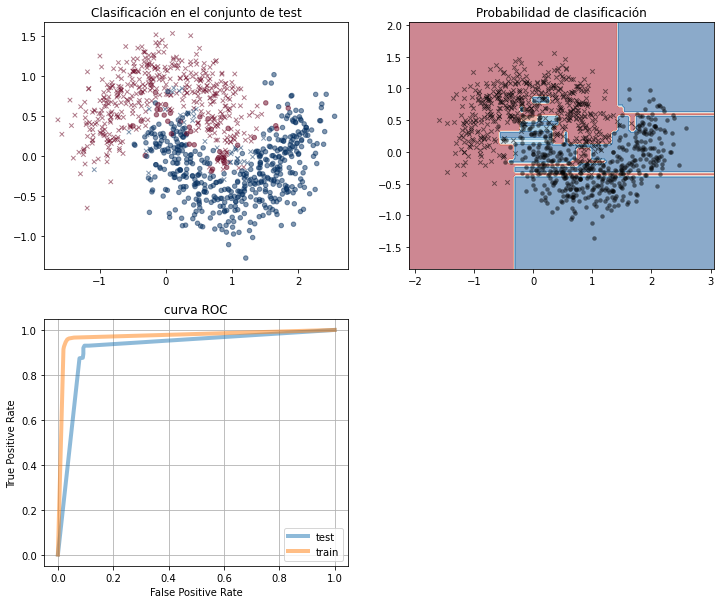

<Figure size 864x720 with 0 Axes>

In [12]:
profundidad_maxima=[3, 10]
for depth in profundidad_maxima:
    print(f'Clasificación para 1 árbol y profundidad máxima {depth}')
    random_forest(1, depth)
    print(' ')

#### Experimento 2.5

Clasificación para 7 árboles y profundidad máxima 3
Area bajo la curva ROC (test): 0.9469460000000001
Area bajo la curva ROC (train): 0.9664680000000001


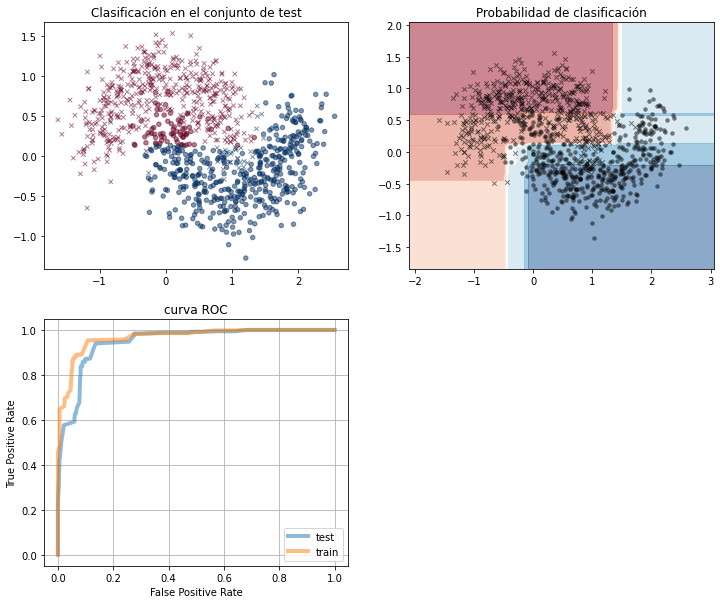

<Figure size 864x720 with 0 Axes>

 
Clasificación para 7 árboles y profundidad máxima 10
Area bajo la curva ROC (test): 0.971992
Area bajo la curva ROC (train): 0.9993479999999999


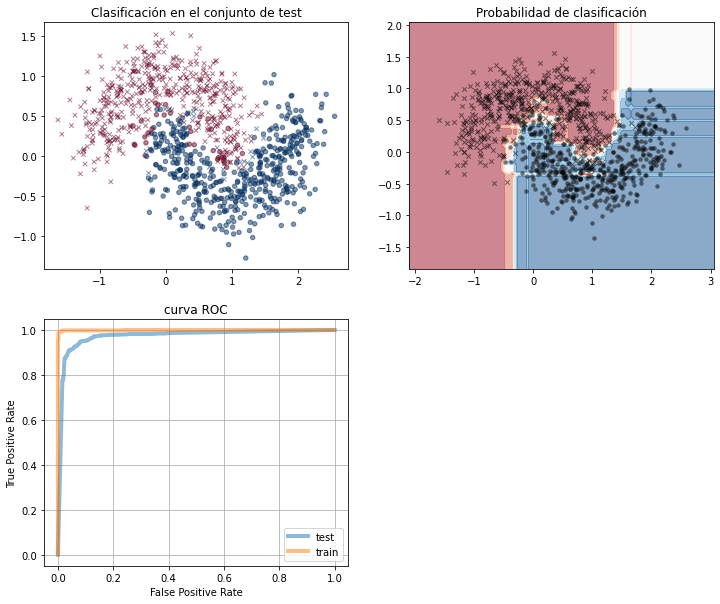

<Figure size 864x720 with 0 Axes>

 
Clasificación para 50 árboles y profundidad máxima 3
Area bajo la curva ROC (test): 0.96864
Area bajo la curva ROC (train): 0.977218


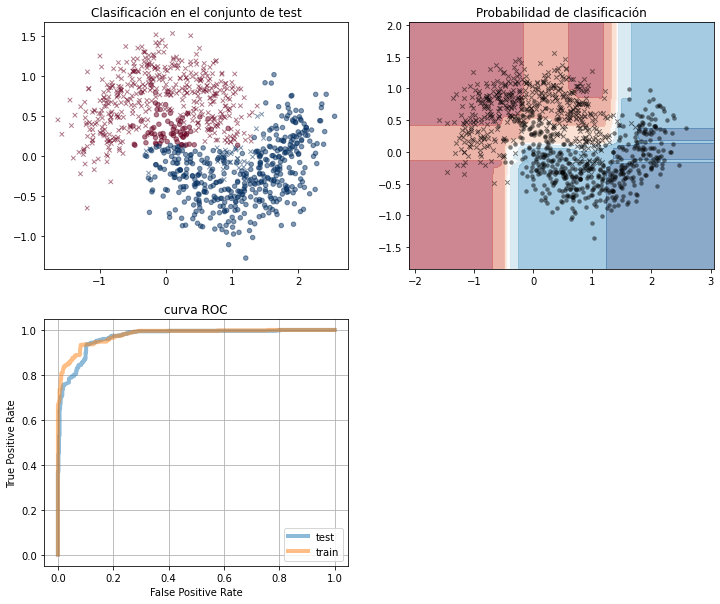

<Figure size 864x720 with 0 Axes>

 
Clasificación para 50 árboles y profundidad máxima 10
Area bajo la curva ROC (test): 0.9824419999999999
Area bajo la curva ROC (train): 1.0


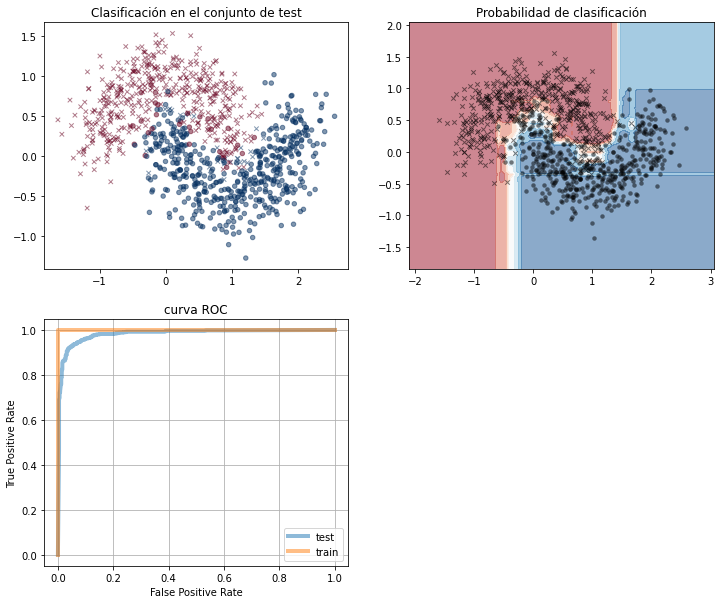

<Figure size 864x720 with 0 Axes>

In [13]:
n_arboles=[7, 50]
profundidad_maxima=[3, 10]

matriz=np.zeros((len(n_arboles), len(profundidad_maxima)))
i=0
for n in n_arboles:
    j=0
    for depth in profundidad_maxima:
        print(f'Clasificación para {n} árboles y profundidad máxima {depth}')
        auc_test, auc_train=random_forest(n, depth)
        matriz[i,j]=auc_test
        j+=1
        print(' ')
    i+=1

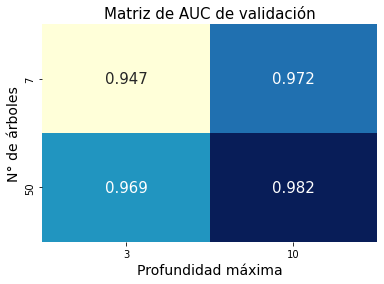

In [14]:
sns.heatmap(data = matriz, cmap='YlGnBu',annot=True,fmt='.3g', yticklabels=['7','50'], xticklabels=['3','10'], cbar=False, annot_kws={"size": 15})
plt.ylabel('N° de árboles',fontsize=14)
plt.xlabel('Profundidad máxima',fontsize=14)
plt.title('Matriz de AUC de validación',fontsize=15)
plt.show()

## B.5 Creacion de dataset "Covertype"

In [15]:
dataset = fetch_covtype()

def dense_to_one_hot(dense):
    a = np.zeros((len(dense), int(np.max(dense))))
    a[np.arange(len(dense)), dense-1] = 1
    return a

X = dataset.data
y = dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

print("Ejemplos por clase (entrenamiento)")
print({c: count for c, count in zip(*np.unique(y_train, return_counts=True))})

print("Ejemplos por clase (validación)")
print({c: count for c, count in zip(*np.unique(y_test, return_counts=True))})

Ejemplos por clase (entrenamiento)
{1: 148288, 2: 198310, 3: 25028, 4: 1923, 5: 6645, 6: 12157, 7: 14357}
Ejemplos por clase (validación)
{1: 63552, 2: 84991, 3: 10726, 4: 824, 5: 2848, 6: 5210, 7: 6153}


## B.6 RF para Covertype

Probar con class_weight $\in (\text{"balanced"}, None)$

Dado n_estimators=30, ajustar max_depth $\in [10, 30, 50]$

In [16]:
clf = RandomForestClassifier(
    n_estimators=30,
    criterion="gini",
    max_depth=10,
    max_features="sqrt",
    n_jobs=-1,
    class_weight="balanced"
)

clf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=30,
                       n_jobs=-1)

## B.7 performance de RF en Covertype


Promedio recall por clase (validacion) 0.807
Promedio recall por clase (training) 0.820
Numero de ejemplos en validacion clasificados correctamente: 117101

Caracteristicas ordenadas por importancia (RF)
	0.258 Elevation
	0.108 Cache la Poudre Wilderness Area
	0.092 Horizontal distance to roadways
	0.046 Horizontal distance to hydrology
	0.045 Horizontal distance to fire points
	0.039 Soil type 10
	0.035 Soil type 3
	0.033 Soil type 38
	0.032 Vertical distance to hydrology
	0.032 Rawah Wilderness Area
	0.031 Soil type 39
	0.029 Hillshade 9am
	0.028 Comanche Peak Wilderness Area
	0.025 Hillshade 3pm
	0.025 Aspect
	0.018 Soil type 40
	0.016 Hillshade noon
	0.015 Soil type 4
	0.012 Slope
	0.010 Soil type 30
	0.009 Soil type 29
	0.009 Soil type 13
	0.008 Soil type 22
	0.007 Soil type 17
	0.007 Soil type 12
	0.006 Soil type 2
	0.005 Neota Wilderness Area
	0.003 Soil type 23
	0.003 Soil type 32
	0.003 Soil type 6
	0.002 Soil type 35
	0.002 Soil type 33
	0.001 Soil type 31
	0.001 Soil type 5

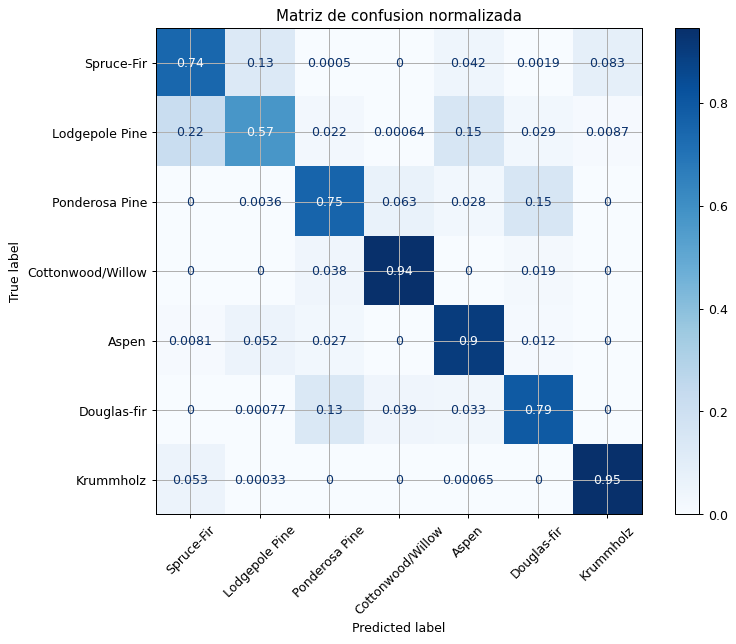

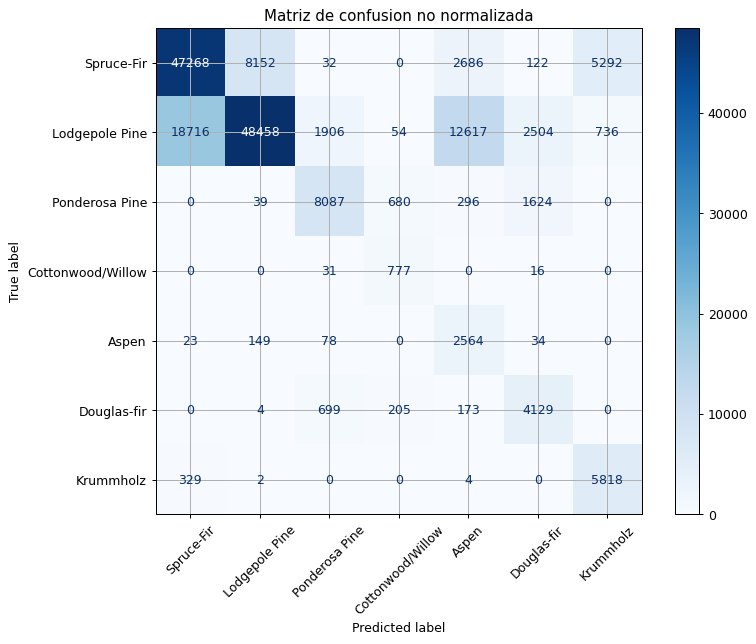

In [17]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

def plot_confusion_matrix(
    y_test,
    y_pred,
    classes,
    normalize=True,
    ax=None,
):
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6), dpi=90)
        fig.tight_layout()

    ConfusionMatrixDisplay.from_predictions(
        y_test,
        y_pred,
        cmap=plt.cm.Blues,
        normalize="true" if normalize else None,
        ax=ax
    )
    
    title = f"Matriz de confusion{' no' if not normalize else ''} normalizada"
    
    ax.set_title(title)
    # ax.colorbar()
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks, classes, rotation=45)
    ax.set_yticks(tick_marks, classes)

    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")
    ax.grid("off")

def mean_recall(cm):
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    return cm.diagonal().mean()

target_names = [
    "Spruce-Fir",
    "Lodgepole Pine",
    "Ponderosa Pine",
    "Cottonwood/Willow",
    "Aspen",
    "Douglas-fir",
    "Krummholz"
]

plot_confusion_matrix(y_test, y_pred, target_names, normalize=True)
plot_confusion_matrix(y_test, y_pred, target_names, normalize=False)

print(f"\nPromedio recall por clase (validacion) {mean_recall(cm):.3f}")

y_train_pred = clf.predict(X_train)
train_cm = confusion_matrix(y_train, y_train_pred)

print(f"Promedio recall por clase (training) {mean_recall(train_cm):.3f}")

print("Numero de ejemplos en validacion clasificados correctamente: %d" % accuracy_score(y_test, y_pred, normalize=False))
print("\nCaracteristicas ordenadas por importancia (RF)")
feature_importances = clf.feature_importances_
importance_order = np.argsort(-feature_importances)
feature_names = [
    "Elevation",
    "Aspect",
    "Slope",
    "Horizontal distance to hydrology",
    "Vertical distance to hydrology",
    "Horizontal distance to roadways",
    "Hillshade 9am",
    "Hillshade noon",
    "Hillshade 3pm",
    "Horizontal distance to fire points",
    "Rawah Wilderness Area",
    "Neota Wilderness Area",
    "Comanche Peak Wilderness Area",
    "Cache la Poudre Wilderness Area"
] + [(f"Soil type {n + 1}") for n in range(40)]
for index in importance_order:
    print(f"\t{feature_importances[index]:.3f} {feature_names[index]}")

### Experimento

In [18]:
def random_forest2(n_estimators, max_depth, class_weight):
    clf = RandomForestClassifier(
        n_estimators=n_estimators,
        criterion="gini",
        max_depth=max_depth,
        max_features="sqrt",
        n_jobs=-1,
        class_weight=class_weight 
    )

    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

    def plot_confusion_matrix(
        y_test,
        y_pred,
        classes,
        normalize=True,
        ax=None,
    ):
        if ax is None:
            fig, ax = plt.subplots(figsize=(8, 6), dpi=90)
            fig.tight_layout()

        ConfusionMatrixDisplay.from_predictions(
            y_test,
            y_pred,
            cmap=plt.cm.Blues,
            normalize="true" if normalize else None,
            ax=ax
        )
        
        title = f"Matriz de confusion{' no' if not normalize else ''} normalizada"
        
        ax.set_title(title)
        # ax.colorbar()
        tick_marks = np.arange(len(classes))
        ax.set_xticks(tick_marks, classes, rotation=45)
        ax.set_yticks(tick_marks, classes)

        ax.set_ylabel("True label")
        ax.set_xlabel("Predicted label")
        ax.grid("off")

    def mean_recall(cm):
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        return cm.diagonal().mean()

    target_names = [
        "Spruce-Fir",
        "Lodgepole Pine",
        "Ponderosa Pine",
        "Cottonwood/Willow",
        "Aspen",
        "Douglas-fir",
        "Krummholz"
    ]

    plot_confusion_matrix(y_test, y_pred, target_names, normalize=True)
    plot_confusion_matrix(y_test, y_pred, target_names, normalize=False)

    print(f"\nPromedio recall por clase (validacion) {mean_recall(cm):.3f}")

    y_train_pred = clf.predict(X_train)
    train_cm = confusion_matrix(y_train, y_train_pred)

    print(f"Promedio recall por clase (training) {mean_recall(train_cm):.3f}")

    print("Numero de ejemplos en validacion clasificados correctamente: %d" % accuracy_score(y_test, y_pred, normalize=False))
    print("\nCaracteristicas ordenadas por importancia (RF)")
    feature_importances = clf.feature_importances_
    importance_order = np.argsort(-feature_importances)
    feature_names = [
        "Elevation",
        "Aspect",
        "Slope",
        "Horizontal distance to hydrology",
        "Vertical distance to hydrology",
        "Horizontal distance to roadways",
        "Hillshade 9am",
        "Hillshade noon",
        "Hillshade 3pm",
        "Horizontal distance to fire points",
        "Rawah Wilderness Area",
        "Neota Wilderness Area",
        "Comanche Peak Wilderness Area",
        "Cache la Poudre Wilderness Area"
    ] + [(f"Soil type {n + 1}") for n in range(40)]
    for index in importance_order:
        print(f"\t{feature_importances[index]:.3f} {feature_names[index]}")

In [19]:
len(feature_names)

54

#### Experimento 2.2


Promedio recall por clase (validacion) 0.809
Promedio recall por clase (training) 0.822
Numero de ejemplos en validacion clasificados correctamente: 115524

Caracteristicas ordenadas por importancia (RF)
	0.282 Elevation
	0.108 Cache la Poudre Wilderness Area
	0.080 Horizontal distance to roadways
	0.043 Horizontal distance to fire points
	0.041 Horizontal distance to hydrology
	0.038 Soil type 10
	0.037 Rawah Wilderness Area
	0.035 Soil type 38
	0.033 Vertical distance to hydrology
	0.032 Soil type 39
	0.029 Soil type 3
	0.029 Hillshade 9am
	0.027 Comanche Peak Wilderness Area
	0.023 Aspect
	0.019 Hillshade 3pm
	0.018 Soil type 4
	0.017 Hillshade noon
	0.013 Soil type 30
	0.013 Soil type 40
	0.012 Slope
	0.009 Soil type 2
	0.008 Soil type 17
	0.008 Soil type 13
	0.008 Soil type 29
	0.007 Soil type 22
	0.007 Soil type 12
	0.004 Neota Wilderness Area
	0.003 Soil type 32
	0.003 Soil type 23
	0.003 Soil type 35
	0.002 Soil type 6
	0.002 Soil type 33
	0.001 Soil type 11
	0.001 Soil type 1

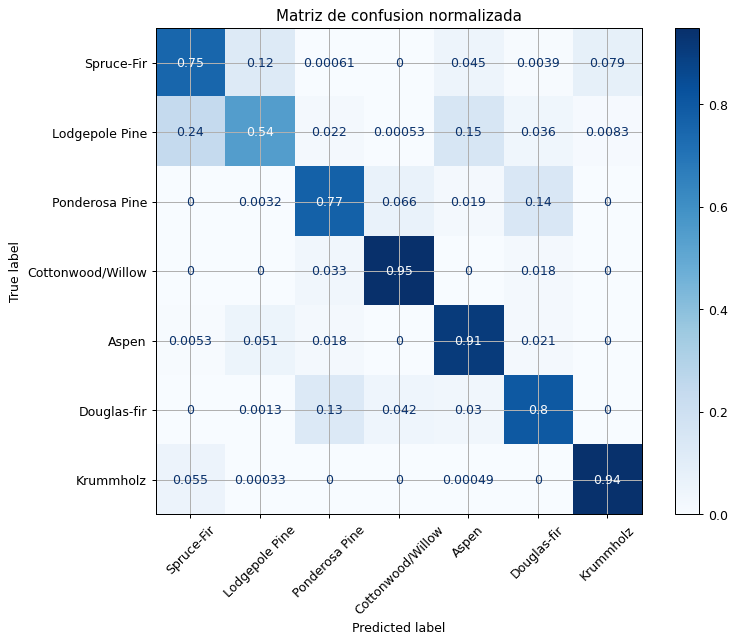

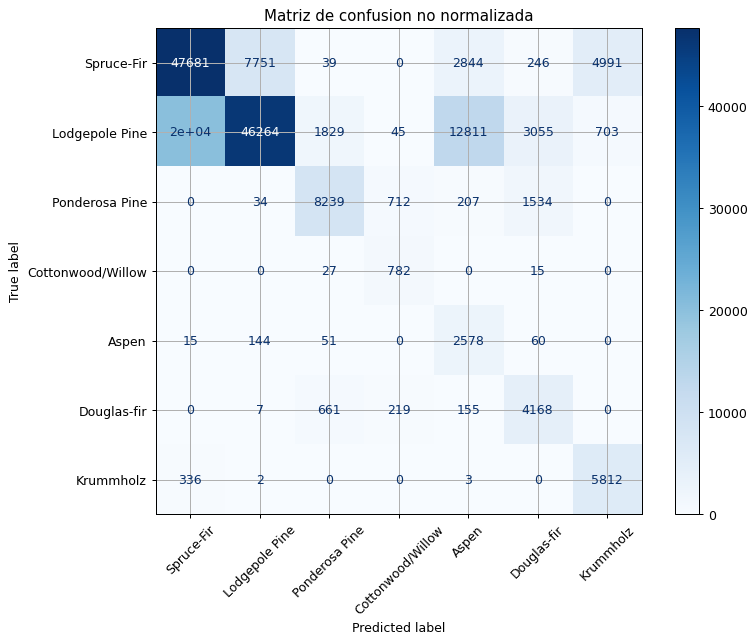

In [20]:
random_forest2(30, 10, 'balanced')


Promedio recall por clase (validacion) 0.509
Promedio recall por clase (training) 0.516
Numero de ejemplos en validacion clasificados correctamente: 132145

Caracteristicas ordenadas por importancia (RF)
	0.338 Elevation
	0.114 Cache la Poudre Wilderness Area
	0.062 Horizontal distance to roadways
	0.038 Soil type 10
	0.037 Horizontal distance to fire points
	0.032 Soil type 12
	0.031 Soil type 4
	0.031 Soil type 22
	0.030 Soil type 39
	0.027 Soil type 2
	0.025 Soil type 23
	0.024 Soil type 38
	0.024 Rawah Wilderness Area
	0.021 Comanche Peak Wilderness Area
	0.019 Horizontal distance to hydrology
	0.019 Hillshade noon
	0.014 Vertical distance to hydrology
	0.013 Soil type 40
	0.013 Hillshade 9am
	0.013 Aspect
	0.012 Hillshade 3pm
	0.010 Slope
	0.008 Soil type 29
	0.007 Neota Wilderness Area
	0.006 Soil type 6
	0.004 Soil type 13
	0.004 Soil type 30
	0.003 Soil type 3
	0.003 Soil type 32
	0.003 Soil type 11
	0.002 Soil type 24
	0.002 Soil type 31
	0.001 Soil type 5
	0.001 Soil type 33

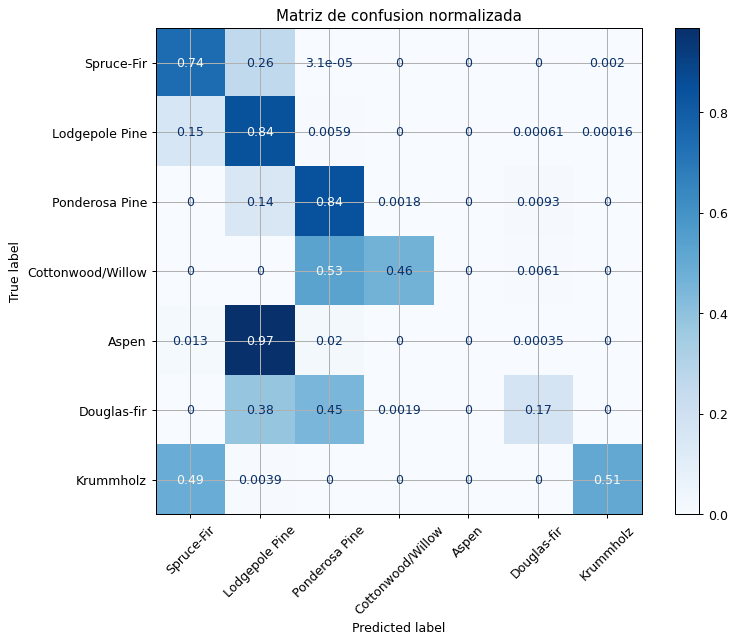

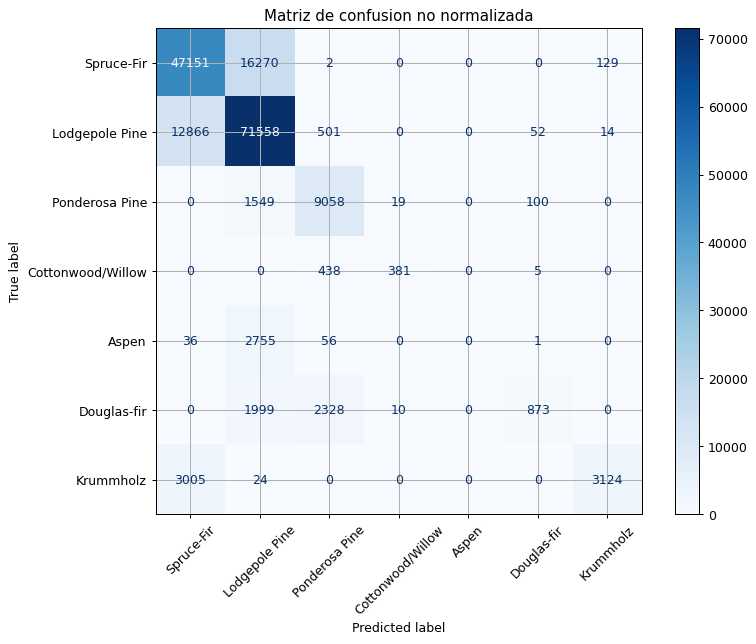

In [21]:
random_forest2(30, 10, None)

#### Experimento 2.3


Promedio recall por clase (validacion) 0.802
Promedio recall por clase (training) 0.817
Numero de ejemplos en validacion clasificados correctamente: 112851

Caracteristicas ordenadas por importancia (RF)
	0.276 Elevation
	0.096 Cache la Poudre Wilderness Area
	0.082 Horizontal distance to roadways
	0.053 Horizontal distance to fire points
	0.046 Horizontal distance to hydrology
	0.041 Soil type 3
	0.038 Soil type 10
	0.034 Rawah Wilderness Area
	0.030 Vertical distance to hydrology
	0.029 Hillshade 9am
	0.028 Comanche Peak Wilderness Area
	0.027 Soil type 38
	0.026 Soil type 39
	0.026 Aspect
	0.022 Hillshade 3pm
	0.017 Soil type 4
	0.015 Soil type 30
	0.013 Slope
	0.013 Hillshade noon
	0.013 Soil type 40
	0.009 Soil type 13
	0.009 Soil type 2
	0.009 Soil type 12
	0.008 Soil type 17
	0.007 Soil type 22
	0.007 Neota Wilderness Area
	0.006 Soil type 29
	0.004 Soil type 23
	0.003 Soil type 32
	0.002 Soil type 35
	0.002 Soil type 6
	0.002 Soil type 14
	0.002 Soil type 33
	0.001 Soil type 1

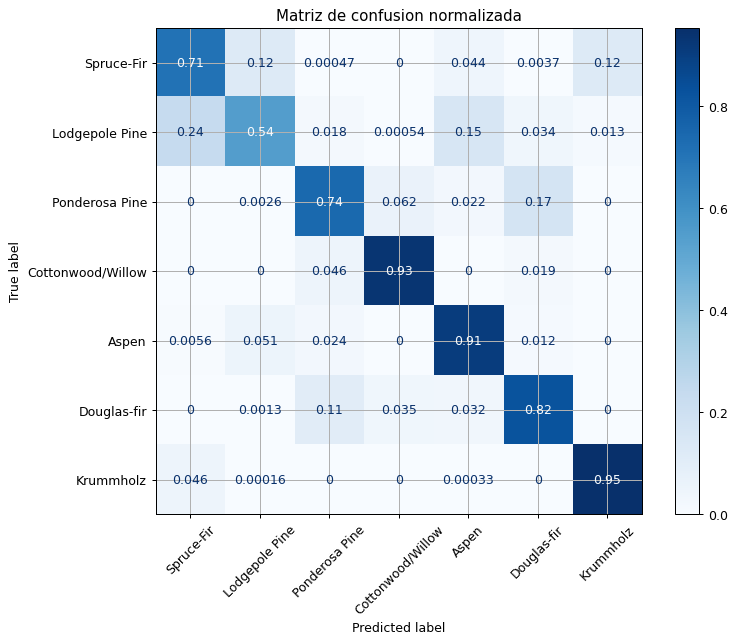

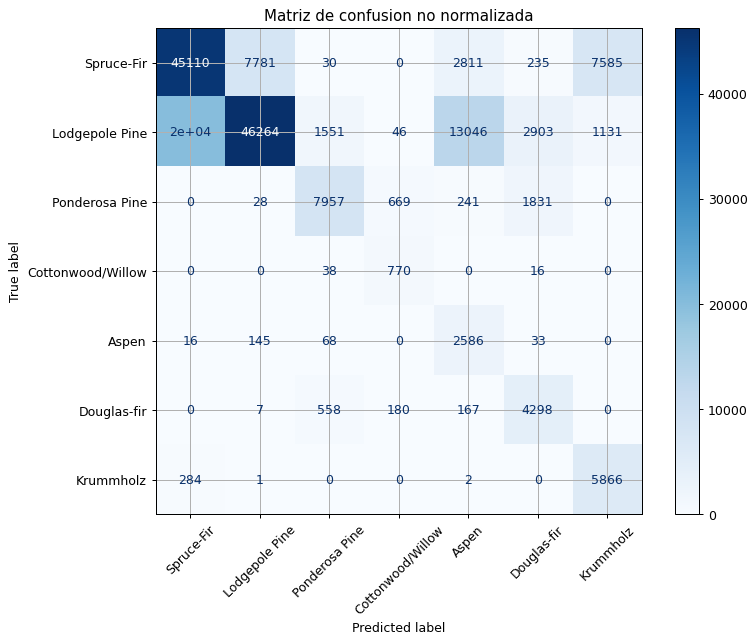

In [22]:
#Experimento para una profundidad de 10
random_forest2(30, 10, 'balanced')



Promedio recall por clase (validacion) 0.905
Promedio recall por clase (training) 0.999
Numero de ejemplos en validacion clasificados correctamente: 164831

Caracteristicas ordenadas por importancia (RF)
	0.238 Elevation
	0.105 Horizontal distance to roadways
	0.086 Horizontal distance to fire points
	0.064 Horizontal distance to hydrology
	0.051 Vertical distance to hydrology
	0.048 Cache la Poudre Wilderness Area
	0.044 Hillshade 9am
	0.042 Aspect
	0.035 Hillshade 3pm
	0.035 Hillshade noon
	0.027 Slope
	0.023 Soil type 10
	0.021 Soil type 3
	0.020 Rawah Wilderness Area
	0.019 Comanche Peak Wilderness Area
	0.019 Soil type 38
	0.016 Soil type 39
	0.013 Soil type 4
	0.008 Soil type 40
	0.008 Soil type 2
	0.007 Soil type 13
	0.006 Soil type 30
	0.006 Soil type 22
	0.006 Soil type 17
	0.006 Soil type 29
	0.005 Soil type 12
	0.005 Soil type 23
	0.004 Soil type 32
	0.004 Soil type 11
	0.004 Neota Wilderness Area
	0.004 Soil type 33
	0.003 Soil type 31
	0.003 Soil type 6
	0.003 Soil type 2

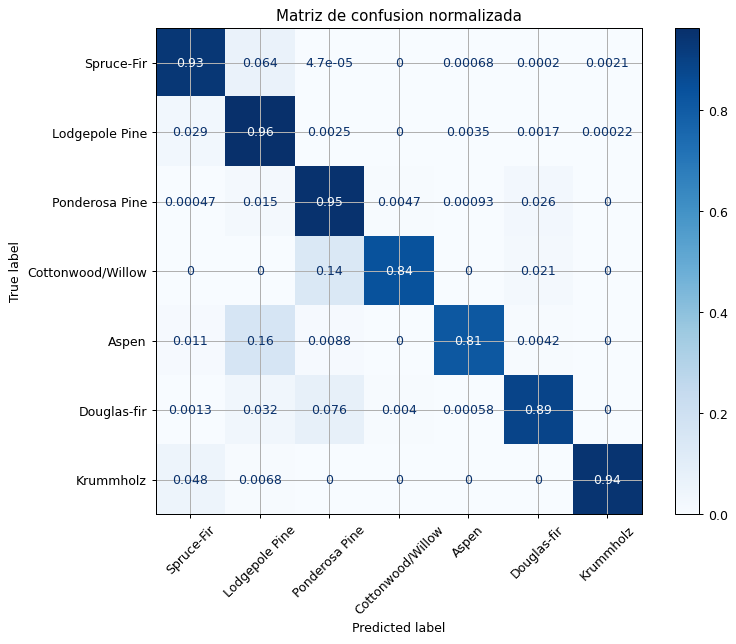

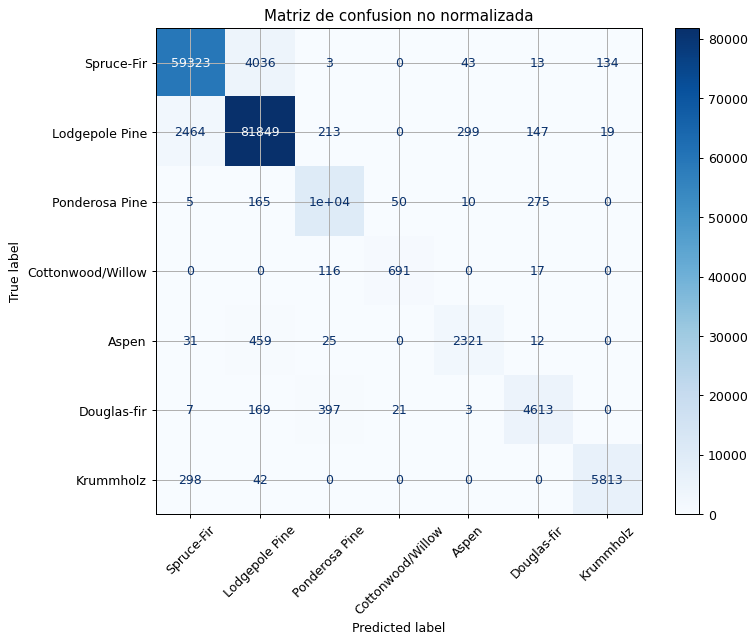

In [23]:
#Experimento para una profundidad de 30
random_forest2(30, 30, 'balanced')


Promedio recall por clase (validacion) 0.894
Promedio recall por clase (training) 0.999
Numero de ejemplos en validacion clasificados correctamente: 165672

Caracteristicas ordenadas por importancia (RF)
	0.238 Elevation
	0.107 Horizontal distance to roadways
	0.086 Horizontal distance to fire points
	0.063 Horizontal distance to hydrology
	0.051 Vertical distance to hydrology
	0.044 Hillshade 9am
	0.044 Cache la Poudre Wilderness Area
	0.044 Aspect
	0.036 Hillshade 3pm
	0.036 Hillshade noon
	0.028 Slope
	0.023 Soil type 3
	0.022 Rawah Wilderness Area
	0.020 Soil type 10
	0.020 Soil type 39
	0.019 Comanche Peak Wilderness Area
	0.018 Soil type 38
	0.012 Soil type 4
	0.008 Soil type 40
	0.007 Soil type 2
	0.006 Soil type 17
	0.006 Soil type 30
	0.005 Soil type 22
	0.005 Soil type 13
	0.005 Soil type 23
	0.005 Soil type 12
	0.004 Soil type 32
	0.004 Neota Wilderness Area
	0.004 Soil type 29
	0.004 Soil type 33
	0.003 Soil type 11
	0.003 Soil type 31
	0.003 Soil type 6
	0.003 Soil type 2

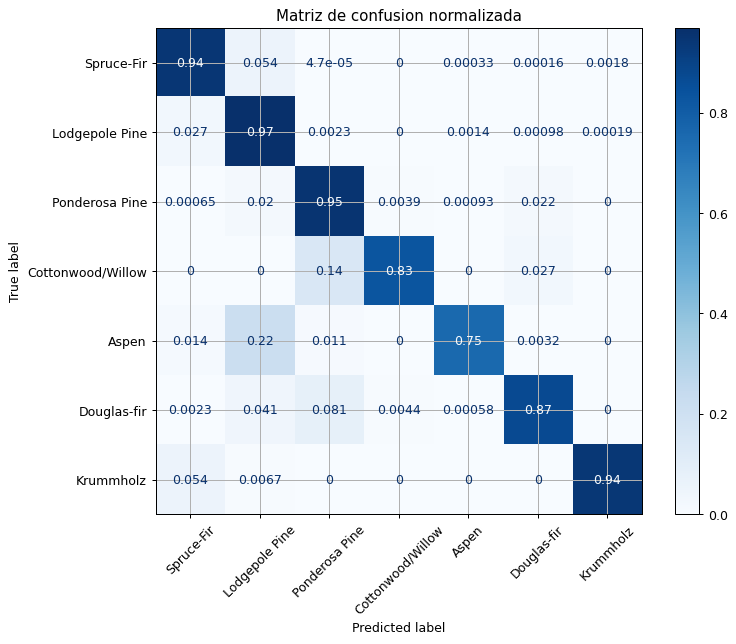

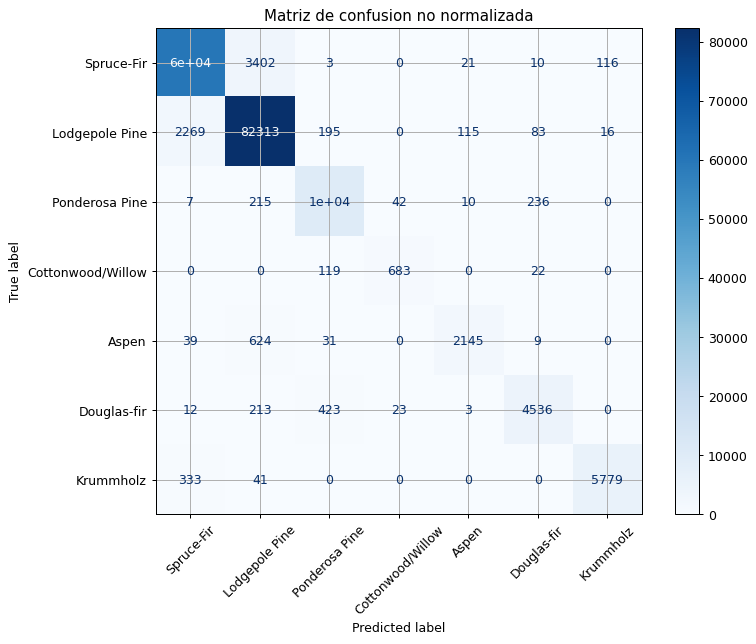

In [24]:
#Experimento para una profundidad de 50
random_forest2(30, 50, 'balanced')

### Programación

#### 1)

In [25]:
size=1000
L=len(np.unique(y))
Sample_y=np.zeros(L, dtype='object')
Sample_X=np.zeros(L, dtype='object') 
j=0
for clase in np.unique(y):
    index=np.random.choice(np.where(y == clase)[0], size, replace=False)
    sample_y_clase=np.zeros(size)
    sample_X_clase=np.zeros((size,54))
    l=0
    for i in index:
        sample_y_clase[l]=y[i]
        sample_X_clase[l,:]=X[i,:]
        l+=1
    Sample_y[j]=sample_y_clase
    Sample_X[j]=sample_X_clase
    j+=1

Sample_X=np.concatenate(Sample_X)
Sample_y=np.concatenate(Sample_y)

#### 2)

In [26]:
Sample_X_train, Sample_X_test, Sample_y_train, Sample_y_test = train_test_split(Sample_X, Sample_y, train_size=0.7, stratify=Sample_y)

print("Ejemplos por clase (entrenamiento)")
print({c: count for c, count in zip(*np.unique(Sample_y_train, return_counts=True))})

print("Ejemplos por clase (validación)")
print({c: count for c, count in zip(*np.unique(Sample_y_test, return_counts=True))})

Ejemplos por clase (entrenamiento)
{1.0: 700, 2.0: 700, 3.0: 700, 4.0: 700, 5.0: 700, 6.0: 700, 7.0: 700}
Ejemplos por clase (validación)
{1.0: 300, 2.0: 300, 3.0: 300, 4.0: 300, 5.0: 300, 6.0: 300, 7.0: 300}


#### 3)

In [27]:
scaler = StandardScaler()
scaled_X_train=scaler.fit_transform(Sample_X_train)
scaled_X_test=scaler.fit_transform(Sample_X_test)

In [28]:
#Media de los datos de entramiento normalizados
scaled_X_train.mean(axis = 0)

array([-3.49816548e-16,  1.08167443e-16,  3.06027879e-16,  1.60840728e-17,
        1.03732216e-16, -6.96495016e-17, -5.83915003e-17,  2.33464042e-16,
        3.04065163e-17, -5.62361948e-17,  3.27538450e-16,  1.32626336e-16,
        2.95795134e-16, -5.99973586e-16,  2.27754323e-16,  3.86323626e-16,
        3.25567238e-16,  1.51590758e-16, -3.48927236e-18, -3.01108345e-16,
        4.59902099e-16, -8.43865794e-16, -2.59254069e-16,  1.11353104e-15,
        5.16922106e-16,  1.74010466e-16,  3.11666792e-16,  4.90950817e-16,
       -2.76849830e-16, -3.07809334e-16,  5.02670468e-16, -5.95609163e-16,
       -3.92577127e-16, -6.18043032e-17,  3.81232744e-16, -1.72288487e-16,
        5.49809631e-16, -1.95433239e-16, -4.35279647e-16,  2.68716455e-16,
        6.12129395e-16, -6.52726172e-16, -4.95771225e-16, -3.00100081e-16,
        1.22679644e-16,  1.03889686e-15, -1.84404646e-15,  9.16137914e-16,
       -4.34012237e-16, -6.57594727e-17,  6.18566989e-16, -4.87671128e-16,
        7.91872237e-16, -

In [29]:
#Desviación estándar de los datos de entrenamiento normalizados
scaled_X_train.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

#### 4)

In [30]:
# Entrenamiento de una C-SVM multiclase del tipo one-versus-all
X_train=scaled_X_train
X_test=scaled_X_test
y_train=Sample_y_train
y_test=Sample_y_test

C_list=[1,10,100]
Gamma_list=[0.1, 1,10]
for c in C_list:
    for gamma in Gamma_list:
        print(f'Clasificación para C = {c} y gamma = {gamma}')
        
        clf = SVC(C=c, kernel='rbf', gamma=gamma, probability=True, decision_function_shape="ovr")

        # Entrenamos
        clf.fit(X_train, y_train)

        # Predecimos la clase de los datos de test
        y_pred = clf.predict(X_test)

        cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
        
        print(f"\nPromedio recall por clase (validacion) {mean_recall(cm):.3f}")

        y_train_pred = clf.predict(X_train)
        train_cm = confusion_matrix(y_train, y_train_pred)

        print(f"Promedio recall por clase (training) {mean_recall(train_cm):.3f}")
        print("Numero de ejemplos en validacion clasificados correctamente: %d" % accuracy_score(y_test, y_pred, normalize=False))
        print(' ')

Clasificación para C = 1 y gamma = 0.1

Promedio recall por clase (validacion) 0.718
Promedio recall por clase (training) 0.803
Numero de ejemplos en validacion clasificados correctamente: 1508
 
Clasificación para C = 1 y gamma = 1

Promedio recall por clase (validacion) 0.707
Promedio recall por clase (training) 0.966
Numero de ejemplos en validacion clasificados correctamente: 1484
 
Clasificación para C = 1 y gamma = 10

Promedio recall por clase (validacion) 0.322
Promedio recall por clase (training) 1.000
Numero de ejemplos en validacion clasificados correctamente: 677
 
Clasificación para C = 10 y gamma = 0.1

Promedio recall por clase (validacion) 0.772
Promedio recall por clase (training) 0.919
Numero de ejemplos en validacion clasificados correctamente: 1621
 
Clasificación para C = 10 y gamma = 1

Promedio recall por clase (validacion) 0.712
Promedio recall por clase (training) 1.000
Numero de ejemplos en validacion clasificados correctamente: 1496
 
Clasificación para C = 1

#### 5)


Promedio recall por clase (validacion) 0.772
Promedio recall por clase (training) 0.919
Numero de ejemplos en validacion clasificados correctamente: 1621
Tasa de acierto promedio (validación): 0.935


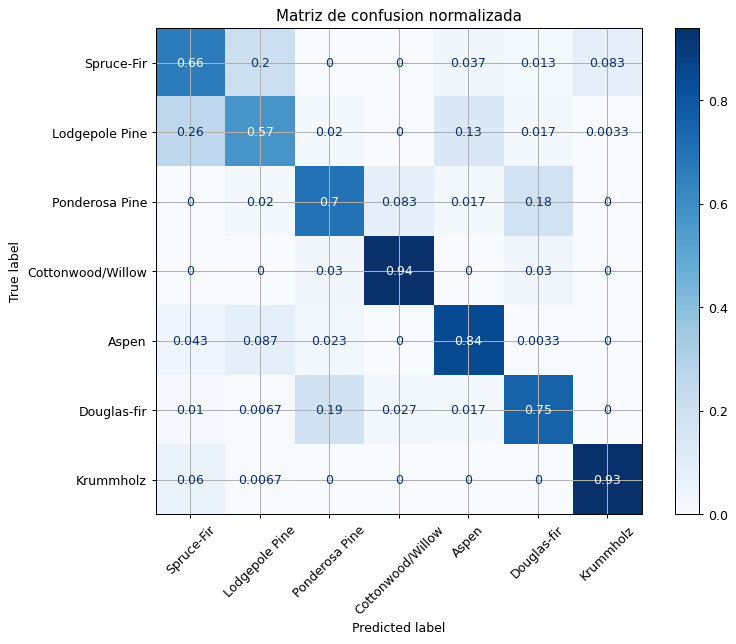

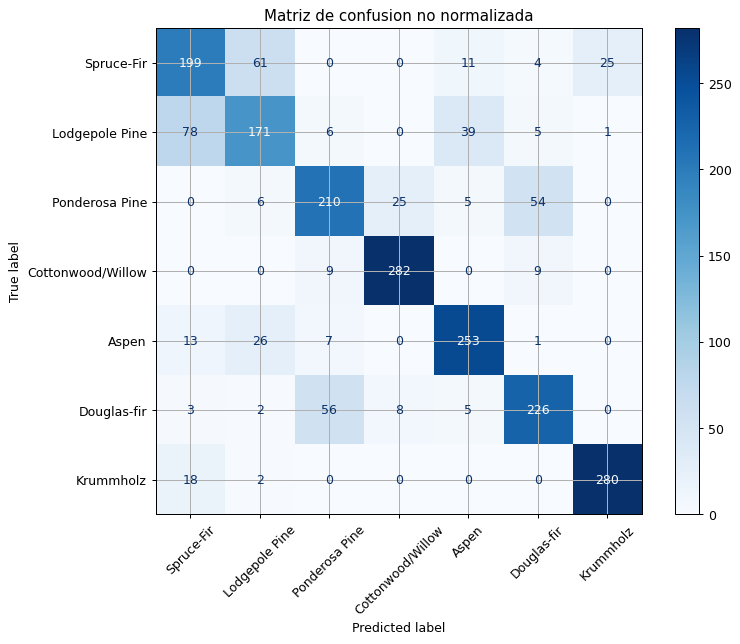

In [31]:
#Entrenamiento y métricas del mejor modelo C-SVM obtenido
clf = SVC(C=10, kernel='rbf', gamma=0.1, probability=True)

# Entrenamos
clf.fit(X_train, y_train)

# Predecimos la clase de los datos de test
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)

print(f"\nPromedio recall por clase (validacion) {mean_recall(cm):.3f}")

y_train_pred = clf.predict(X_train)
train_cm = confusion_matrix(y_train, y_train_pred)

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
mean_accuracy=np.mean((TP+TN)/(TP+TN+FP+FN))

print(f"Promedio recall por clase (training) {mean_recall(train_cm):.3f}")
print("Numero de ejemplos en validacion clasificados correctamente: %d" % accuracy_score(y_test, y_pred, normalize=False))
print(f"Tasa de acierto promedio (validación): {mean_accuracy:.3f}")

plot_confusion_matrix(y_test, y_pred, target_names, normalize=True)
plot_confusion_matrix(y_test, y_pred, target_names, normalize=False)